In [56]:
from tensorflow import keras
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"Training size: {train_images.shape}\nTesting size: {test_images.shape}\nTraining labels: {train_labels.shape}\nTesting labels: {test_labels.shape}")

Training size: (60000, 28, 28)
Testing size: (10000, 28, 28)
Training labels: (60000,)
Testing labels: (10000,)


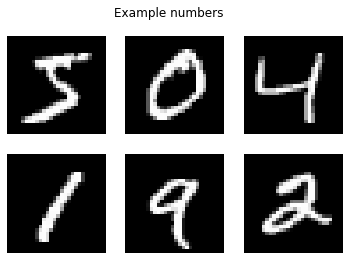

In [58]:
fig, ax = plt.subplots(2, 3)
fig.suptitle("Example numbers")
p=0
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(train_images[p], cmap='gray')
        ax[i][j].axis('off')
        p+=1

In [59]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [60]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [61]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [62]:
train_images = train_images.astype(np.float32) / 255.0  
test_images = test_images.astype(np.float32) / 255.0
print(f"Training size: {train_images.shape}\nTesting size: {test_images.shape}")

Training size: (60000, 784)
Testing size: (10000, 784)


In [63]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [64]:
network.fit(train_images, train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2632 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1059 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0698 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0383 - accuracy: 0.9888


In [65]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9781
test_acc: 0.9781000018119812
